<h2> Evaluation</h2>
Now we want to find out what we got.<br>
<br>
What we are bringing is 200 simulated data sets from a hurdle distriburion with the non-zero data being exp(generalized Gaussian). This data is similar to what I was working with in a previous company. In particular, we are simluating an A/B test where the test group is slightly better than the control group. I care about the probability T is better, calculated from the data set.<br>
<br>
In the first file, we have three sets of calculations:
<ol><li>Bayesian with good structure and hyperparameters that seem appropriate to the data</li>
    <li>Bayesian with good structure and hyperparameters that seem fairly poor for the data</li>
    <li>T-Tests on the data</li>
</ol>
I am going to make three analysis:
<ol><li>First, calcualte how often the Bayesian methods failed. The exception handling is getting the probability of T being best as 0.50 in the event of an issue.</li>
    <li>Second, for the cases where both methids passed calculate a 0/1 variable that the probability that T is better is 0.95 or better, and a 0/1 variable that the T-Test p-value is under 0.05. This is an Un-Bayesian test, but it lets me compare Bayesian methods with traditional methods</li>
    <li> Also, graph the probability that T is better from both PyMC methods to see if there is a difference.</li>
</ol>
<br> 
In the second file we have the results with a normal prior and also T_Test results. 

In [1]:
import pandas as pd
import numpy as np
import math as m
import pickle

In [2]:
resultFile1 = r"C:\Users\efree\BayesTests_v0.pkl"

In [3]:
with open(resultFile1, 'rb') as fileName:
          resultList1 = pickle.load(fileName)
dataResults1 = pd.DataFrame(data=resultList1, columns=['tBayes_good', 'tBayes_poor', 't_mean', 'c_mean', 'p_value'])

In [4]:
dataResults1['Bayes_Good_Ran'] = dataResults1.apply(lambda x: 0 if x['tBayes_good']==0.50 else 1, axis=1)
dataResults1['Bayes_Poor_Ran'] = dataResults1.apply(lambda x: 0 if x['tBayes_poor']==0.50 else 1, axis=1)
dataResults1_BothRan = dataResults1.query('Bayes_Good_Ran==1 and Bayes_Poor_Ran==1').copy()

In [5]:
print("Success rate with good hyperparameters: ", dataResults1['Bayes_Good_Ran'].mean())
print("Success rate with poor hyperparameters: ", dataResults1['Bayes_Poor_Ran'].mean())

Success rate with good hyperparameters:  0.9857142857142858
Success rate with poor hyperparameters:  0.919047619047619


In [6]:
dataResults1_BothRan['Bayes_Poor_Passed'] = dataResults1_BothRan.apply(lambda x: 1 if x['tBayes_poor']>0.95  else 0, axis=1)
dataResults1_BothRan['Bayes_Good_Passed'] = dataResults1_BothRan.apply(lambda x: 1 if x['tBayes_good']>0.95  else 0, axis=1)
dataResults1_BothRan['TTest_Passed']      = dataResults1_BothRan.apply(lambda x: 1 if x['p_value']<0.05 else 0, axis=1)

In [7]:
print("Percent of the tests the good Bayes prior passed 95%:", dataResults1_BothRan['Bayes_Good_Passed'].mean())
print("Percent of the tests the poor Bayes prior passed 95%:", dataResults1_BothRan['Bayes_Poor_Passed'].mean())
print("Percent of the tests the T-Test p-value was under 5%:", dataResults1_BothRan['TTest_Passed'].mean())
print("Expected if no lift from random chance: ", 0.05)

Percent of the tests the good Bayes prior passed 95%: 0.3769633507853403
Percent of the tests the poor Bayes prior passed 95%: 0.3717277486910995
Percent of the tests the T-Test p-value was under 5%: 0.15706806282722513
Expected if no lift from random chance:  0.05


<Axes: xlabel='tBayes_good', ylabel='tBayes_poor'>

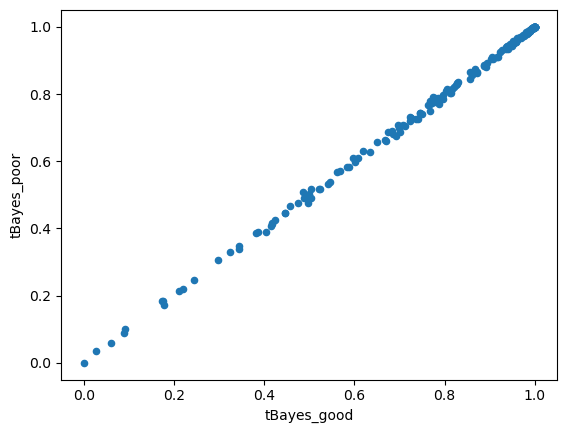

In [8]:
dataResults1_BothRan.plot.scatter(x='tBayes_good', y='tBayes_poor')

<h2>Results</h2>
When the PyMC code ran, the results are identical. PyMC with better-chosen hyperparameters runs more often. Both Bayesian approaches are much more powerful than the T-Test approach.

<h2>Using a Normal Prior</h2>
Now we run the analysis with a Normal prior, and making a comparison between Bayesian with a normal prior and T-Tests.<br>
<br>
Why didn't I run the Normal prior tests on the same datasets as the two hurdle model tests above? The normal priors kept failing. I never figured out why, I just put the normal runs in their own workbook.

In [9]:
resultFile2 = r"C:\Users\efree\BayesTests_Normal_v0.pkl"

In [10]:
with open(resultFile2, 'rb') as fileName:
          resultList2 = pickle.load(fileName)
dataResults2 = pd.DataFrame(data=resultList2, columns=['tBayes_normal', 't_mean', 'c_mean', 'p_value'])

In [11]:
dataResults2['Bayes_Normal_Ran'] = dataResults2.apply(lambda x: 0 if x['tBayes_normal']==0.50 else 1, axis=1)
dataResults2_BothRan = dataResults2.query('Bayes_Normal_Ran==1').copy()

In [12]:
print("Success rate with Normal prior: ", dataResults2['Bayes_Normal_Ran'].mean())

Success rate with Normal prior:  0.905


In [13]:
dataResults2_BothRan['Bayes_Normal_Passed'] = dataResults2_BothRan.apply(lambda x: 1 if x['tBayes_normal']>0.95  else 0, axis=1)
dataResults2_BothRan['TTest_Passed']        = dataResults2_BothRan.apply(lambda x: 1 if x['p_value']<0.05 else 0, axis=1)

In [14]:
print("Percent of the tests the Normal prior passed 95%:", dataResults2_BothRan['Bayes_Normal_Passed'].mean())
print("Percent of the tests the T-Test p-value was under 5%:", dataResults2_BothRan['TTest_Passed'].mean())
print("Expected if no lift from random chance: ", 0.05)

Percent of the tests the Normal prior passed 95%: 0.26519337016574585
Percent of the tests the T-Test p-value was under 5%: 0.1712707182320442
Expected if no lift from random chance:  0.05


<h2>Results</h2>
Bayes with a Normal prior is slightly more powerful than T-Test, but only slightly. The difference is significant.